# scikit learn, unsupervised anomaly detection

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Load

In [86]:
train_df = pd.read_csv('./data/train.csv')
val_df = pd.read_csv('./data/val.csv')
test_df = pd.read_csv('./data/test.csv')

In [87]:
train_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [88]:
val_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


### Train/Validation Feature 분포 확인

In [89]:
# train_df.drop(columns=['ID']).hist(bins = 50, figsize = (20,20))
# plt.show()

In [90]:
# val_df.drop(columns=['ID', 'Class']).hist(bins = 50, figsize = (20,20))
# plt.show()

### Feature normalize, RobustScaler

In [91]:
from sklearn.preprocessing import RobustScaler

normalize_train_df = train_df.drop(columns=['ID'])

transformer = RobustScaler()
transformer.fit(normalize_train_df)
normalize_train_df = transformer.transform(normalize_train_df)

normalize_train_df = pd.DataFrame(normalize_train_df,columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30'])
# normalize_train_df.hist(bins = 50, figsize = (20,20))
# plt.show()

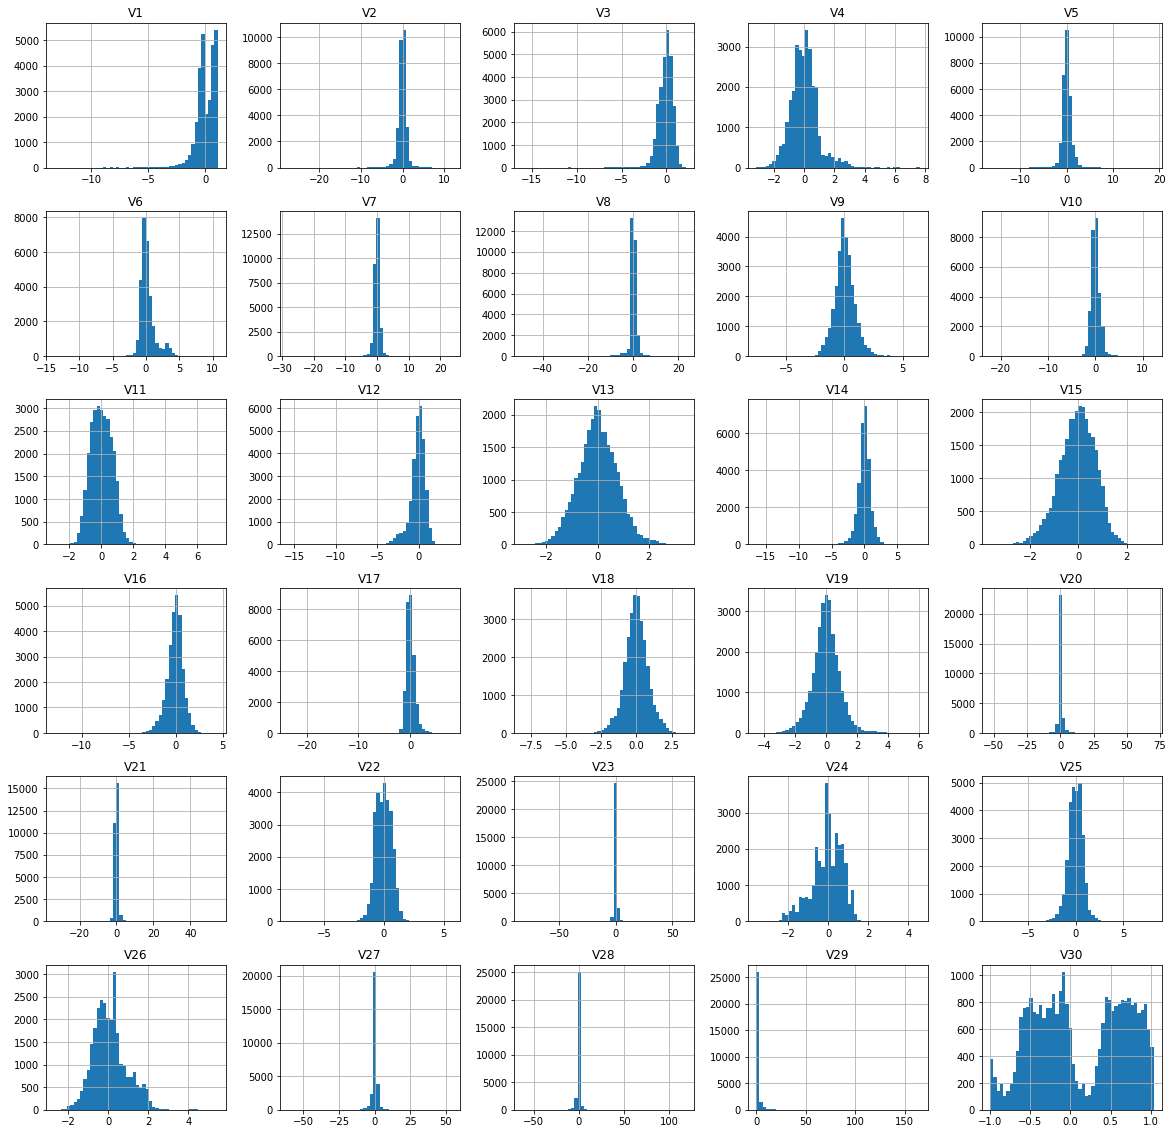

In [92]:
normalize_val_df = val_df.drop(columns=['ID','Class'])

transformer = RobustScaler()
transformer.fit(normalize_val_df)
normalize_val_df = transformer.transform(normalize_val_df)

normalize_val_df = pd.DataFrame(normalize_val_df,columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30'])
normalize_val_df.hist(bins = 50, figsize = (20,20))
plt.show()

## 사기 거래 비율

In [93]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


In [94]:
# 사기 거래 비율이 val_df보다 클때
contamination_large = 0.00073
# 사기 거래 비율이 vad_df보다 작을때
contamination_small = 0.00068

## IsolationForest

In [95]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [96]:
model_normal = IsolationForest(n_estimators=125, max_samples=len(normalize_train_df), contamination=val_contamination, random_state=42, verbose=0)
model_normal.fit(normalize_train_df)

IsolationForest(contamination=0.0010551491277433877, max_samples=113842,
                n_estimators=125, random_state=42)

In [97]:
model_normal_large = IsolationForest(n_estimators=125, max_samples=len(normalize_train_df), contamination=contamination_large, random_state=42, verbose=0)
model_normal_large.fit(normalize_train_df)

IsolationForest(contamination=0.00073, max_samples=113842, n_estimators=125,
                random_state=42)

In [98]:
model_normal_small = IsolationForest(n_estimators=125, max_samples=len(normalize_train_df), contamination=contamination_small, random_state=42, verbose=0)
model_normal_small.fit(normalize_train_df)

IsolationForest(contamination=0.00068, max_samples=113842, n_estimators=125,
                random_state=42)

### Evaluation

In [99]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [100]:
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

val_pred = model_normal_large.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.7238565678297559]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.46      0.43      0.45        30

    accuracy                           1.00     28462
   macro avg       0.73      0.72      0.72     28462
weighted avg       1.00      1.00      1.00     28462



In [101]:
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

val_pred = model_normal_small.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.7102361650869573]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.44      0.40      0.42        30

    accuracy                           1.00     28462
   macro avg       0.72      0.70      0.71     28462
weighted avg       1.00      1.00      1.00     28462



In [102]:
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

val_pred = model_normal.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.7109070265966368]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.37      0.50      0.42        30

    accuracy                           1.00     28462
   macro avg       0.68      0.75      0.71     28462
weighted avg       1.00      1.00      1.00     28462



In [103]:
val_x = normalize_val_df # Input Data
val_y = val_df['Class'] # Label

val_pred = model_normal_large.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.7072746231706779]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.48      0.37      0.42        30

    accuracy                           1.00     28462
   macro avg       0.74      0.68      0.71     28462
weighted avg       1.00      1.00      1.00     28462



In [104]:
val_x = normalize_val_df # Input Data
val_y = val_df['Class'] # Label

val_pred = model_normal_small.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.7112747113626281]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.50      0.37      0.42        30

    accuracy                           1.00     28462
   macro avg       0.75      0.68      0.71     28462
weighted avg       1.00      1.00      1.00     28462



In [105]:
val_x = normalize_val_df # Input Data
val_y = val_df['Class'] # Label

val_pred = model_normal.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.7060238515365931]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.39      0.43      0.41        30

    accuracy                           1.00     28462
   macro avg       0.70      0.72      0.71     28462
weighted avg       1.00      1.00      1.00     28462



# Sub

In [106]:
test_contamination = 0.007
model_test = IsolationForest(n_estimators=125, max_samples=len(normalize_train_df), contamination=test_contamination, random_state=42, verbose=0)
model_test.fit(normalize_train_df)

test_x = test_df.drop(columns=['ID'])
test_pred = model_test.predict(test_x)
test_pred = get_pred_label(test_pred)
submit = pd.read_csv('./data/sample_submission.csv')
submit['Class'] = test_pred
submit.to_csv('./submit.csv', index=False)